# 0.0 Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import datasets as ds
from sklearn import ensemble as en
from sklearn import metrics as mt
from sklearn import model_selection as ms

/tmp/ipykernel_13266/2442410050.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# 1.0 Loading data

In [2]:
X, y = ds.make_classification (n_samples=1000,
                               n_classes=2,
                               n_features=8,
                               n_redundant=3,
                               random_state=0)

In [3]:
X_train, X_test, y_train, y_test = ms.train_test_split(X, y, test_size=0.2, random_state=0)

# 2.0 Model Training

In [4]:
# definition
model = en.RandomForestClassifier(n_estimators=2, max_depth=3, random_state=0)

# fit 
model.fit(X_train, y_train)

# performance
yhat_test = model.predict_proba(X_test)[:,1]

# 3.0 ROC Curve

In [5]:
fpr, tpr, th = mt.roc_curve(y_test, yhat_test)

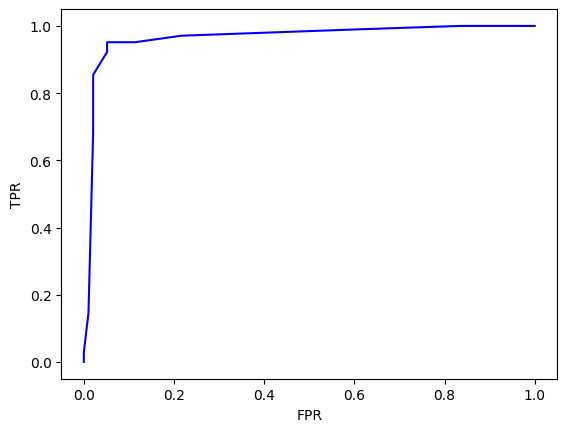

In [6]:
plt.plot(fpr, tpr, color='b')
plt.xlabel('FPR');
plt.ylabel('TPR');

In [7]:
distance = np.sqrt((1-tpr)**2 + fpr**2)

In [8]:
best_th = th[np.argmin(distance)]
print(f'Best Threshold: {best_th}')

Best Threshold: 0.5307063197026023


In [9]:
yhat_test = (yhat_test >= best_th).astype(int)
acc = mt.accuracy_score(y_test, yhat_test)
print(f'Accuracy: {acc}')

Accuracy: 0.95


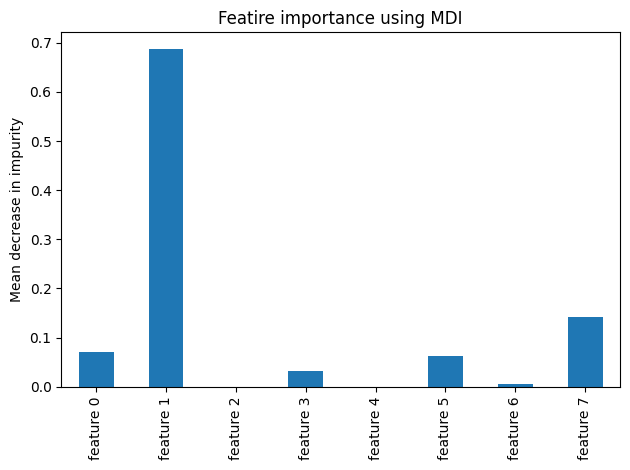

In [12]:
featur_name = [f'feature {i}' for i in range(X.shape[1])]
importances = model.feature_importances_

forest_importances = pd.Series(importances, index=featur_name)

fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax)
ax.set_title('Featire importance using MDI')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()